In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels 
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns 
import utils

In [2]:
data = pd.read_csv('data/final.csv')

In [3]:
data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,bmi,charges,smoker_no,smoker_yes,categorie_age_Adulte,categorie_age_Jeune,categorie_age_Sénior,bmi_log,charges_log,charges_log2,bmi_log2,smoking_status
0,0,0,0,27.90,16884.9240,0,1,0,1,0,3.328627,9.734176,2.275643,1.202560,1
1,1,1,1,33.77,1725.5523,1,0,0,1,0,3.519573,7.453302,2.008657,1.258340,0
2,2,2,2,33.00,4449.4620,1,0,0,1,0,3.496508,8.400538,2.128296,1.251765,0
3,3,3,3,28.88,3866.8552,1,0,0,1,0,3.363149,8.260197,2.111448,1.212878,0
4,4,4,4,25.74,3756.6216,1,0,0,1,0,3.248046,8.231275,2.107941,1.178054,0


<Axes: xlabel='bmi', ylabel='charges'>

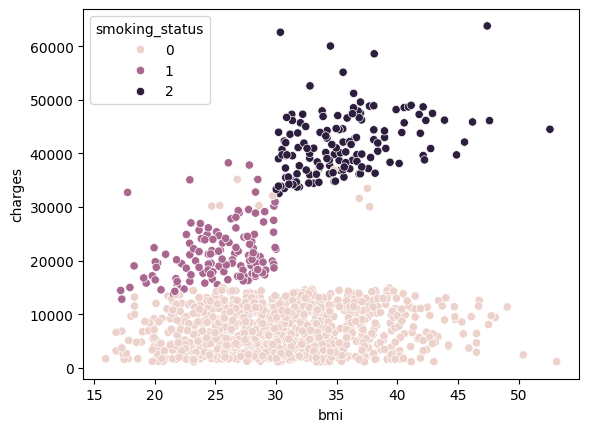

In [4]:
sns.scatterplot(data,x='bmi', y='charges', hue='smoking_status')

In [5]:
X = data[['bmi_log','smoker_yes', 'categorie_age_Adulte',
       'categorie_age_Sénior']].values 
y = data['bmi_log2'].values 

In [25]:
#modele : log(log(charges)) = log(bmi) + ....
data.corr()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,bmi,charges,smoker_no,smoker_yes,categorie_age_Adulte,categorie_age_Jeune,categorie_age_Sénior,bmi_log,charges_log,charges_log2,bmi_log2,smoking_status
Unnamed: 0.2,1.000000,1.000000,1.000000,-0.041193,0.000933,-0.003764,0.003764,0.028126,0.010498,-0.039398,-0.046494,0.010519,0.012092,-0.047531,0.000229
Unnamed: 0.1,1.000000,1.000000,1.000000,-0.041193,0.000933,-0.003764,0.003764,0.028126,0.010498,-0.039398,-0.046494,0.010519,0.012092,-0.047531,0.000229
Unnamed: 0,1.000000,1.000000,1.000000,-0.041193,0.000933,-0.003764,0.003764,0.028126,0.010498,-0.039398,-0.046494,0.010519,0.012092,-0.047531,0.000229
bmi,-0.041193,-0.041193,-0.041193,1.000000,0.203693,-0.008937,0.008937,-0.017494,-0.071112,0.093208,0.990878,0.133057,0.124656,0.984607,0.142686
charges,0.000933,0.000933,0.000933,0.203693,1.000000,-0.834226,0.834226,0.028629,-0.248869,0.236016,0.203426,0.889973,0.861858,0.202350,0.916796
smoker_no,-0.003764,-0.003764,-0.003764,-0.008937,-0.834226,1.000000,-1.000000,-0.030250,-0.013623,0.044855,-0.006309,-0.725534,-0.696267,-0.005516,-0.937806
smoker_yes,0.003764,0.003764,0.003764,0.008937,0.834226,-1.000000,1.000000,0.030250,0.013623,-0.044855,0.006309,0.725534,0.696267,0.005516,0.937806
categorie_age_Adulte,0.028126,0.028126,0.028126,-0.017494,0.028629,-0.030250,0.030250,1.000000,-0.533419,-0.436242,-0.013087,0.124681,0.139754,-0.011602,0.023675
categorie_age_Jeune,0.010498,0.010498,0.010498,-0.071112,-0.248869,-0.013623,0.013623,-0.533419,1.000000,-0.528422,-0.078399,-0.486236,-0.509940,-0.080427,0.007107
categorie_age_Sénior,-0.039398,-0.039398,-0.039398,0.093208,0.236016,0.044855,-0.044855,-0.436242,-0.528422,1.000000,0.096538,0.392123,0.402211,0.097204,-0.031323


In [7]:
model = sm.formula.ols(formula='charges_log2 ~ bmi_log+smoker_yes+categorie_age_Sénior+categorie_age_Adulte -1',
                       data=data)
fit = model.fit()
fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           charges_log2   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          9.422e+04
Date:                Fri, 22 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:49:19   Log-Likelihood:                          814.15
No. Observations:                1256   AIC:                                     -1620.
Df Residuals:                    1252   BIC:                                     -1600.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bmi_log                  0.6131      0.002    345.220      0.000       0.610       0.617
smoker_yes               0.1827      0.009     21.079      0.000       0.166       0.200
categorie_age_Sénior     0.1214      0.009     13.951      0.000       0.104       0.138
categorie_age_Adulte     0.0926      0.009     10.731      0.000       0.076       0.110
==============================================================================
Omnibus:                        4.146   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                4.051
Skew:                           0.136   Prob(JB):                        0.132
Kurtosis:                       3.056   Cond. No.                         10.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Autocorrelation TEST**

In [8]:
resid = fit.resid

Text(0, 0.5, 'residuals')

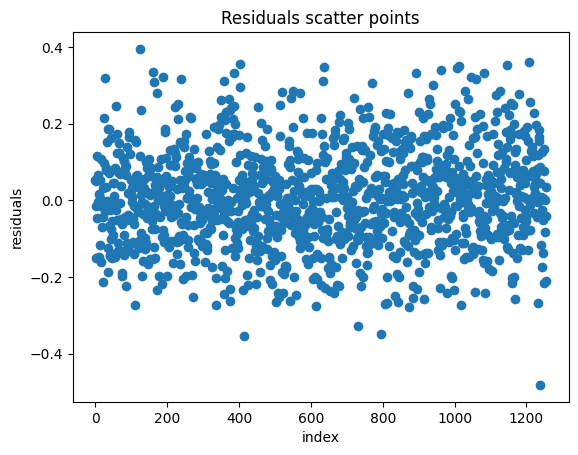

In [9]:
plt.scatter(np.arange(len(resid)), resid)
plt.title('Residuals scatter points')
plt.xlabel('index')
plt.ylabel('residuals')

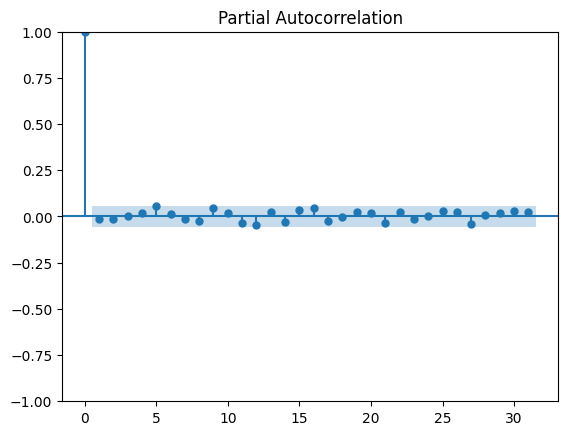

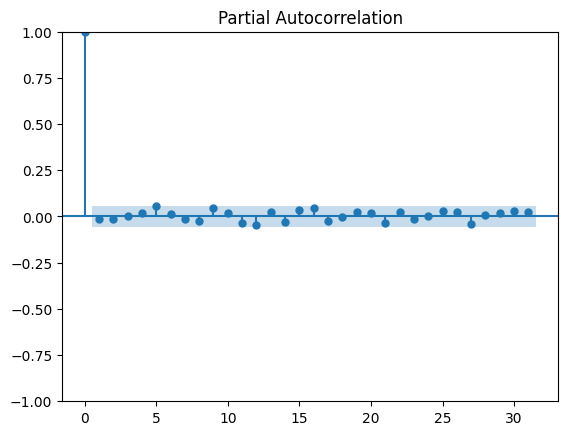

In [11]:
statsmodels.graphics.tsaplots.plot_pacf(resid)

In [12]:
#durbin watson 
utils._durbin(resid)

Durbin-Watson Statistic: 2.021576384617253
There’s no significant autocorrelation in your residuals.


In [13]:
#godfrey 
utils._ljbox(resid, lags=12)

Ljung-Box Test Statistic: 14.129748184072005, p-value: 0.29249967094857104
No significant autocorrelation detected in the residuals (do not reject null hypothesis).


### **heteroscedasticity**

In [14]:
exog = fit.model.exog[:, 1:]
exog.shape

(1256, 3)

In [15]:

utils._white(resid, exog=exog)

White Test Statistic (LM): 22.1966989570492, p-value: 0.00048038042401379503
White Test Statistic (F): 4.497617030665674, p-value: 0.0004561260724025674


'Decision: Reject the null hypothesis. Evidence of heteroskedasticity.'

In [16]:
utils._breuschpg(resid,exog)

Breusch-Pagan Test Statistic: 21.743520473089763, p-value: 7.3757841384005e-05
Decision: Reject the null hypothesis. There is evidence of heteroskedasticity.


Text(0, 0.5, 'residuals**2')

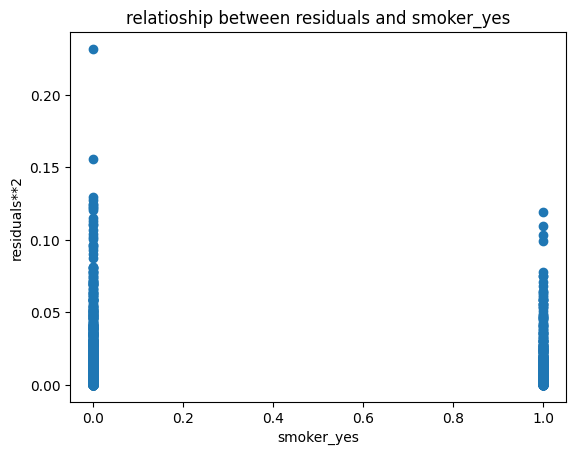

In [17]:
plt.scatter(exog[:,1], resid**2)
plt.title('relatioship between residuals and smoker_yes')
plt.xlabel('smoker_yes')
plt.ylabel('residuals**2')

Text(0, 0.5, 'residuals**2')

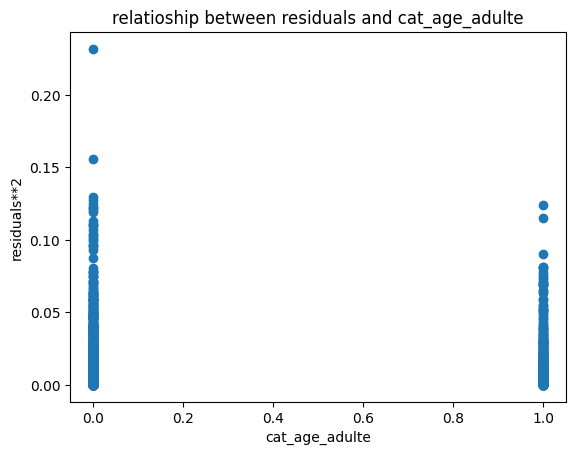

In [18]:
plt.scatter(exog[:,2], resid**2)
plt.title('relatioship between residuals and cat_age_adulte')
plt.xlabel('cat_age_adulte')
plt.ylabel('residuals**2')

### **Normality**

In [19]:
utils._jarqueb(resid)

Jarque-Bera Statistic: 4.0507076079589535, p-value: 0.13194715150118327
Residuals are normally distributed (do not reject null hypothesis).


In [20]:
utils._kolmogorov_sm(resid)

Kolmogorov-Smirnov Statistic: 0.028396811831560287, p-value: 0.2583143698835273
Residuals are approximately normally distributed (do not reject null hypothesis).


Text(0.5, 1.0, 'Residuals distribution')

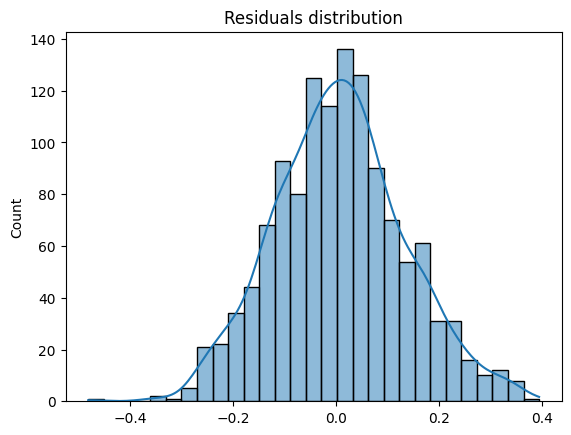

In [21]:
sns.histplot(resid, kde=True)
plt.title('Residuals distribution')

### **Multicol**

In [22]:
utils.detect_multicollinearity(data)

'No significant multicollinearity detected. Condition number: -24551191518409240.00-0.00j. (Threshold: 30)'

In [23]:
utils.calculate_vif(data)

c:\Users\Bureau\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF,Interpretation
0,Unnamed: 0.2,inf,"Strong multicollinearity, consider removing va..."
1,Unnamed: 0.1,inf,"Strong multicollinearity, consider removing va..."
2,Unnamed: 0,inf,"Strong multicollinearity, consider removing va..."
3,bmi,2.194633e+03,"Strong multicollinearity, consider removing va..."
4,charges,7.959563e+01,"Strong multicollinearity, consider removing va..."
5,smoker_no,inf,"Strong multicollinearity, consider removing va..."
6,smoker_yes,inf,"Strong multicollinearity, consider removing va..."
7,categorie_age_Adulte,inf,"Strong multicollinearity, consider removing va..."
8,categorie_age_Jeune,inf,"Strong multicollinearity, consider removing va..."
9,categorie_age_Sénior,inf,"Strong multicollinearity, consider removing va..."


### **Handling the heteroscedasticity**

In [24]:
robust_model = fit.get_robustcov_results(cov_type='HC3')


print("\nOLS Summary (Robust to Heteroskedasticity):\n", robust_model.summary())


OLS Summary (Robust to Heteroskedasticity):
                                  OLS Regression Results                                
Dep. Variable:           charges_log2   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.010e+05
Date:                Fri, 22 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:49:21   Log-Likelihood:                          814.15
No. Observations:                1256   AIC:                                     -1620.
Df Residuals:                    1252   BIC:                                     -1600.
Df Model:                           4                                                  
Covariance Type:                  HC3                                                  
                           coef    std err          t      P>|t|      [0.0